In [1446]:
from xgboost import XGBRegressor as xgbr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import time

In [1447]:
df = pd.read_csv('cocoa_ratings_clean.csv')

In [1448]:
df.head()

,Unnamed: 0,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,892,kallari (ecuatoriana),diego/ original micro,248,2008,85.0,ecuador,2.50,unknown,ecuador
1,1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
2,954,l'amourette,rugoso,1784,2016,80.0,u.s.a.,3.50,trinitario,nicaragua
3,29,aequare (gianduja),"los rios, quevedo, arriba",370,2009,55.0,ecuador,2.75,forastero (arriba),ecuador
4,533,devries,costa rica,166,2007,77.0,u.s.a.,3.50,trinitario,costa rica


In [1449]:
df = df[(df['rating'] >= 2) & (df['rating'] <= 3)]

In [1450]:
df.head()

,Unnamed: 0,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,892,kallari (ecuatoriana),diego/ original micro,248,2008,85.0,ecuador,2.50,unknown,ecuador
3,29,aequare (gianduja),"los rios, quevedo, arriba",370,2009,55.0,ecuador,2.75,forastero (arriba),ecuador
6,1453,shark's,"hilo, w/ added cocoa butter",721,2011,73.0,u.s.a.,2.50,unknown,hawaii
9,734,glennmade,bahia,1672,2015,66.0,u.s.a.,3.00,"trinitario, forastero",brazil
16,834,hotel chocolat (coppeneur),"chanchamayo, pichanadi, 2012, 60hr c.",1109,2013,100.0,u.k.,2.75,unknown,peru


In [1451]:
df['ratio'] = df['ref'] / df['cocoa_percent'] 

In [1452]:
def encode_values(df, column):
    final_vals = []
    registered_vals = {}
    for i, val in enumerate(df[column]):
        if not val in list(registered_vals.keys()):
            registered_vals[val] = i
        final_vals.append(registered_vals[val])
    return final_vals

In [1453]:
categorical_cols = ['maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']

In [1454]:
encoded_cols = np.array([encode_values(df, col) for col in categorical_cols])

In [1455]:
df['maker'] = encoded_cols[0]
df['specific_origin'] = encoded_cols[1]
df['company_location'] = encoded_cols[2]
df['bean_type'] = encoded_cols[3]
df['broad_origin'] = encoded_cols[4]

In [1456]:
df.head()

,Unnamed: 0,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,ratio
0,892,0,0,248,2008,85.0,0,2.50,0,0,2.917647
3,29,1,1,370,2009,55.0,0,2.75,1,0,6.727273
6,1453,2,2,721,2011,73.0,2,2.50,0,2,9.876712
9,734,3,3,1672,2015,66.0,2,3.00,3,3,25.333333
16,834,4,4,1109,2013,100.0,4,2.75,0,4,11.090000


In [1457]:
df = df.drop(['Unnamed: 0'], axis=1)#, 'maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin'], axis=1)

In [1458]:
# ingenieria de caracteristicas
df['rating'] = df['rating'].apply(lambda x : str(x))

In [1459]:
ratings = df['rating']
ratio = df['ratio']
#df = df.iloc[:, :3]
df['rating'] = ratings
df['ratio'] = ratio

df.head()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,ratio
0,0,0,248,2008,85.0,0,2.5,0,0,2.917647
3,1,1,370,2009,55.0,0,2.75,1,0,6.727273
6,2,2,721,2011,73.0,2,2.5,0,2,9.876712
9,3,3,1672,2015,66.0,2,3.0,3,3,25.333333
16,4,4,1109,2013,100.0,4,2.75,0,4,11.090000


In [1460]:
Y = df['rating']
X = df.drop('rating', axis=1)

In [1461]:
Y = Y.apply(lambda  x : float(x))

In [1462]:
# use 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [1471]:
reg_model = RandomForestClassifier(500, n_jobs=-1, random_state=42, max_features=None, max_depth=None)
reg_model = xgbr(n_estimators=500, max_depth=5, subsample=0.8, nthread=-1, learning_rate=0.1)
#dt = DecisionTreeRegressor(max_depth=None)
#reg_model = AdaBoostRegressor(base_estimator=dt, n_estimators=500, random_state=24)
#reg_model = GradientBoostingRegressor(n_estimators=500)
#reg_model = LinearRegression()
#reg_model = LogisticRegression()

In [1472]:
reg_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [1473]:
# get predictions for evaluation
start_time = time.time()
predictions_train = reg_model.predict(X_train) 
predictions_test = reg_model.predict(X_test)
train_sec = time.time() - start_time
print("Took {0:0.2f} seconds or {1:0.2f} minutes to make predictions on both sets.".format(train_sec, train_sec/60))

Took 0.05 seconds or 0.00 minutes to make predictions on both sets.


In [1474]:
print('TRAIN')
print("MSE: {0:0.5f}".format(mean_squared_error(predictions_train, Y_train))) # RMSE (Root Mean Square Error)
print("R^2: {0:0.2f}".format(reg_model.score(X_train, Y_train))) # r^2

TRAIN
MSE: 0.00016
R^2: 1.00


In [1467]:
print('TEST')
print("MSE: {0:0.5f}".format(mean_squared_error(predictions_test, Y_test))) # RMSE (Root Mean Square Error)
print("R^2: {0:0.2f}".format(reg_model.score(X_test, Y_test))) # r^2

TEST
MSE: 0.05932
R^2: -0.15


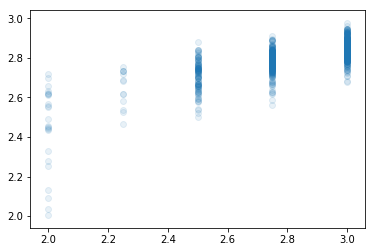

In [1468]:
# make some visualizations of the results on train
%matplotlib inline
#plt.ylim(ymax=60); plt.ylim(ymin=-5)
#plt.xlim(xmax=60); plt.xlim(xmin=-5)
plt.scatter(Y_train.values, predictions_train, alpha=0.1)
plt.show()

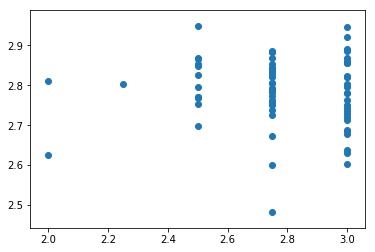

In [1469]:
# and on test
%matplotlib inline
#plt.ylim(ymax=60); plt.ylim(ymin=-5)
#plt.xlim(xmax=60); plt.xlim(xmin=-5)
plt.scatter(Y_test.values, predictions_test)#, alpha=0.1)
plt.show()

In [1470]:
reg_model.feature_importances_

AttributeError: 'XGBRegressor' object has no attribute 'feature_importances_'